In [1]:
!pip install praw

In [2]:
!pip install wordcloud

In [3]:
!pip install pandas-profiling

In [4]:
import praw
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import os
from praw.models import MoreComments
import time
import pandas_profiling

reddit = praw.Reddit(
     client_id="3gRvZgbUzCz_Tg",
     client_secret="BuNkAnAhJFZhtDMw303NyxiIonIkpg",
     user_agent="image-scraper"
)

Version 7.2.0 of praw is outdated. Version 7.4.0 was released Friday July 30, 2021.


In [5]:
print(reddit.read_only)  # Output: True

True


In [6]:
sub_list = ['Cryptocurrency', 'Altcoin', 'Best_of_Crypto', 'BitcoinMarkets', 'Blockchain', 'BitcoinMining', 'CryptoMarkets', 
            'CryptoRecruiting', 'CryptoTechnology', 'CryptoTrade', 'Ethfinance', 'EthTrader', 'Jobs4Crypto', 'Liberland', 
            'LitecoinMarkets', 'LitecoinMining', 'OpenBazaar', 'XMRtrader', 'GPUmining']

In [7]:
# Define name of subreddit
sub = 'Cryptocurrency'
# Define the name of the directory to be created. Replace with your directory location.
path = './' + sub
# Define the name of the directory for the CSV file to be stored
path_dir = './'
#path_dir = 'C:/Users/Derek/desktop/PRAW/'

In [8]:
subreddit = reddit.subreddit(sub)

# display the subreddit name 
print(subreddit.display_name)

# display the subreddit title 
print(subreddit.title)

# display the subreddit description 
print(subreddit.description)

Cryptocurrency
Cryptocurrency News & Discussion
* [Open Mod Positions](http://bit.ly/2lpgEKX)
* [Rules](http://bit.ly/2mMN3wE)
* [Policies](http://bit.ly/2lpEAhv)
* **Flair Filters**
    1. [Adoption](https://goo.gl/DJQbeY)
    1. [Announcements](https://goo.gl/5DLv5e)
    1. [Clients](https://goo.gl/cRVehz)
    1. [Comedy](https://goo.gl/YP7E55)
    1. [Critical-Discussions](https://goo.gl/YDj2th)
    1. [Creative](https://goo.gl/kfgBwN)
    1. [Development](https://goo.gl/aOyxnC)
    1. [Educational](https://goo.gl/iGTkQQ)
    1. [Exchanges](https://goo.gl/GP6ppk)
    1. [Finance](https://goo.gl/KsVyST) 
    1. [Focused-Discussions](https://goo.gl/VUqmLc)
    1. [Daily-Discussions](https://old.reddit.com/r/CryptoCurrency/search?q=author%3AAutoModerator+Daily+Discussion+&amp;restrict_sr=on&amp;sort=new&amp;t=all)
    1. [General-News](https://goo.gl/EotdG2)
    1. [Innovations](https://goo.gl/le0scJ)
    1. [Legacy](https://goo.gl/EfwtTA)
    1. [Media](https://goo.gl/ItCfRS)
    1. [

In [9]:
# Sort Submissions by: rising, new, hot, gilded, controversial, top
# Replace 'top' with any of the sorting options from above
# Max limit of 1000 requests
# Estimated time of 9 minutes to run this cell

d = []
for submission in reddit.subreddit(sub).top(limit=1000):
    d.append(                                            
        {                                                
            'Title': submission.title,
            'Score': submission.score,
            'Id':  submission.id,
            'Url': submission.url,
            'Author': submission.author,
#            'Comments': submission.comments,
            'Created_utc': submission.created_utc,
            'Original Content': submission.is_original_content,
            'Flair Text': submission.link_flair_text,
            'Full Name': submission.name,
            'Locked': submission.locked,
            'Number of Comments': submission.num_comments,
            'NSFW': submission.over_18,
            'Upvote Percentage': submission.upvote_ratio,
            'Text': submission.selftext
        }
    )

top = pd.DataFrame(d)

In [10]:
top.head()

Title  Score      Id  \
0  You hear about the kid who put in $500 into a ...  53035  n7rl2y   
1  Binance CEO, CZ, shades Elon Musk in tweet. - ...  44873  noztp7   
2  It's been a crazy ride these past 7 years, but...  37313  nch8rm   
3  Elon Musk Is Not One Of Us. Stop Using Him As ...  36732  mntcz3   
4  How much will the price of Litecoin move by Mo...  29028  n43gno   

                                                 Url                Author  \
0  https://www.reddit.com/r/CryptoCurrency/commen...            jonbristow   
1  https://coinquora.com/binance-ceo-weighs-in-on...           jasonluxton   
2  https://www.reddit.com/r/CryptoCurrency/commen...           BTC_Hadzija   
3  https://www.reddit.com/r/CryptoCurrency/commen...  GroundbreakingLack78   
4  https://www.reddit.com/r/CryptoCurrency/commen...           nanooverbtc   

    Created_utc  Original Content                           Flair Text  \
0  1.620488e+09             False                             STRATEGY   
1  1.622455e+09             False  CONTROVERSIAL POST. COMMENTS SORTED   
2  1.621022e+09             False                               COMEDY   
3  1.618011e+09             False                   FOCUSED-DISCUSSION   
4  1.620066e+09             False                               🗳 POLL   

   Full Name  Locked  Number of Comments   NSFW  Upvote Percentage  \
0  t3_n7rl2y   False                4446  False               0.90   
1  t3_noztp7   False                7608  False               0.66   
2  t3_nch8rm   False                1618  False               0.81   
3  t3_mntcz3   False                3035  False               0.82   
4  t3_n43gno    True                 373  False               0.70   

                                                Text  
0  You hear about the kid who put in $500 into a ...  
1                                                     
2  I'm tired of holding an asset that I'm always ...  
3  I’m tired of seeing him as a face of crypto in...  
4  Reference price: $297.69\n\n[Data will be sour...

In [11]:
top.shape

(925, 14)

In [12]:
# Create date string for csv file name
timestr = time.strftime("%Y%m%d")
print(timestr)

20210812


In [13]:
top.to_csv(path_dir + 'top_' + sub + '_' + timestr + '.csv', index = False)

In [14]:
top.describe()

Score   Created_utc  Number of Comments  Upvote Percentage
count    925.000000  9.250000e+02          925.000000         925.000000
mean    6292.237838  1.590191e+09          861.510270           0.915135
std     5154.820868  4.323772e+07         1214.237682           0.057366
min     2410.000000  1.501587e+09            1.000000           0.640000
25%     3007.000000  1.542285e+09          360.000000           0.890000
50%     4384.000000  1.615126e+09          634.000000           0.930000
75%     7407.000000  1.621608e+09         1080.000000           0.950000
max    53035.000000  1.628756e+09        29256.000000           0.990000

In [15]:
# Pandas profile report for profile analysis of top datset
profile = pandas_profiling.ProfileReport(top)
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


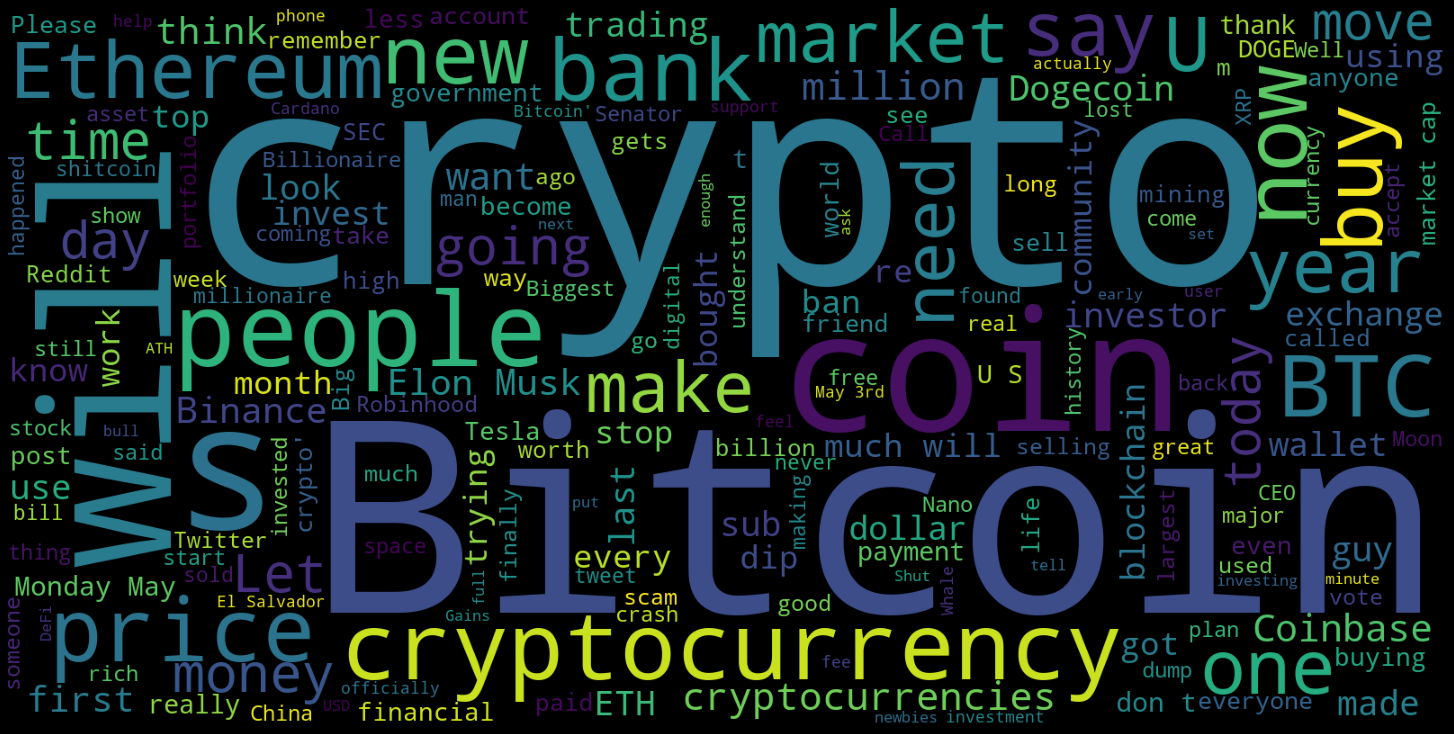

In [16]:
#wordcloud
top_title = top['Title'].values 

wordcloud = WordCloud(width=1600, height=800).generate(str(top_title))

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig(sub + ".png", facecolor='k')
plt.show()

In [17]:
# String to be searched in end of string
search = "jpg", "gif", "png", 'webm'
  
# boolean series returned with False in place of NaN 
bool_series = top["Url"].str.lower().str.endswith(search, na = False) 
  
# displaying filtered dataframe 
top[bool_series] 

Title  Score      Id  \
25                                    Checkmate, Bill.  19628  80xb4n   
33   Delta's app store description seems appropriat...  18471  7qr6ky   
62                         The true power of Bitcoin 🔥  14643  c1zlny   
66                                       You're hired!  14360  ltbf8v   
79                           It be like that sometimes  13952  lnuia6   
..                                                 ...    ...     ...   
912  Seriously, how is it possible to be this delus...   2420  8h3qxj   
913  Put everything in bitcoin and live like a home...   2419  79ab8m   
914                                    Taking the loss   2424  7vimn5   
920            Yes, we just had a text-book bubble pop   2414  7rajja   
921  When you show your altcoin "portfolio" to a fr...   2410  ltbgk0   

                                     Url          Author   Created_utc  \
25   https://i.redd.it/vmcf9d93dzi01.jpg         sash187  1.519835e+09   
33       https://i.imgur.com/qcDbWMz.png             x2P  1.516095e+09   
62   https://i.redd.it/h4n3169pq2531.jpg  mtimetraveller  1.560846e+09   
66   https://i.redd.it/4mob24a7vwj61.jpg      DestroRe13  1.614384e+09   
79   https://i.redd.it/0dd65me00ji61.jpg         Jakeron  1.613780e+09   
..                                   ...             ...           ...   
912  https://i.redd.it/hntm94jogxv01.jpg         Gludius  1.525478e+09   
913   https://i.redd.it/ze2dnx3axkuz.png   VeryAngryFish  1.509200e+09   
914  https://i.redd.it/5r55lgp81he01.jpg         tofke83  1.517870e+09   
920      https://i.imgur.com/e6SuFfG.jpg         stevoli  1.516290e+09   
921  https://i.redd.it/41lwp1tfvwj61.gif          tghGaz  1.614384e+09   

     Original Content     Flair Text  Full Name  Locked  Number of Comments  \
25              False       POLITICS  t3_80xb4n   False                1083   
33              False         COMEDY  t3_7qr6ky   False                 315   
62              False        METRICS  t3_c1zlny   False                1267   
66              False         COMEDY  t3_ltbf8v   False                 510   
79              False         COMEDY  t3_lnuia6   False                 653   
..                ...            ...        ...     ...                 ...   
912             False  THREAD LOCKED  t3_8h3qxj    True                1086   
913             False         Comedy  t3_79ab8m   False                 263   
914             False          MEDIA  t3_7vimn5   False                 200   
920             False        METRICS  t3_7rajja   False                 688   
921              True         COMEDY  t3_ltbgk0   False                 133   

      NSFW  Upvote Percentage Text  
25   False               0.67       
33   False               0.91       
62   False               0.84       
66   False               0.94       
79   False               0.94       
..     ...                ...  ...  
912  False               0.83       
913  False               0.94       
914  False               0.95       
920  False               0.90       
921  False               0.97       

[181 rows x 14 columns]

In [18]:
# Create dataframe of boolean filtered series
top_bool = top[bool_series]
# Create list of all URL's of images
image_urls = top_bool['Url'].to_list()
# Create List of all titles of Posts
names = top_bool['Title'].to_list()

In [19]:
# define the access rights
access_rights = 0o755

try:
    os.mkdir(path, access_rights)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s" % path)

Successfully created the directory ./Cryptocurrency


In [20]:
# Check current working directory.
retval = os.getcwd()
print(("Current working directory %s") % retval)

# Now change the directory
os.chdir( path )

# Check current working directory.
retval = os.getcwd()

print(("Directory changed successfully %s") % retval)

Current working directory d:\Data\Data Science Projects\Cryptocurrency-Sentiment-Analysis
Directory changed successfully d:\Data\Data Science Projects\Cryptocurrency-Sentiment-Analysis\Cryptocurrency


In [21]:
# Download Images to newly created directory

download_images = []

for img in image_urls:
    try:
        # Split the file based upon / and extract the last split within the python list below:
        file_name = img.split('/')[-1]
        print(f"This is the file name: {file_name}")
        # Send a request to the image URL:
        r = requests.get(img, stream=True)
        # Check that the status code is 200 before doing anything else:
        if r.status_code == 200:
            # Allow us to write the data to a file as binary:
            with open(file_name, 'wb') as f:
                for chunk in r:
                    f.write(chunk)
        else:
            # Write all of the images back to the broken_images list:
            download_images.append(img)
    except:
        pass

This is the file name: vmcf9d93dzi01.jpg
This is the file name: qcDbWMz.png
This is the file name: h4n3169pq2531.jpg
This is the file name: 4mob24a7vwj61.jpg
This is the file name: 0dd65me00ji61.jpg
This is the file name: giphy.gif
This is the file name: nervous-smiling-guy-meme-image-gallery-hcpr-on-fake-smile-meme.jpg
This is the file name: q9VkMPn.jpg
This is the file name: ezwzpgj3dne01.jpg
This is the file name: 1eyhom7lsx201.png
This is the file name: gpah290qvee61.jpg
This is the file name: u02zw6e1vzi01.jpg
This is the file name: 9vgwzhogps531.jpg
This is the file name: df8ecd130os01.jpg
This is the file name: bkr8lx4ekvc01.jpg
This is the file name: j7d95fntca601.png
This is the file name: eckqbnpib7a61.jpg
This is the file name: ak4x8h8z6yn01.jpg
This is the file name: 2makopuw6de61.jpg
This is the file name: 3gfa6cegbc431.jpg
This is the file name: mx9jwlp5t4b01.jpg
This is the file name: asgcjna7p0011.gif
This is the file name: lrdupoiyrr931.jpg
This is the file name: 5o730